In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_scoring.csv to credit_scoring.csv


In [ ]:
import pandas as pd
Credit = pd.read_csv("credit_scoring.csv")
Credit

Age  Gender Marital Status Education Level Employment Status  \
0     60    Male        Married          Master          Employed   
1     25    Male        Married     High School        Unemployed   
2     30  Female         Single          Master          Employed   
3     58  Female        Married             PhD        Unemployed   
4     32    Male        Married        Bachelor     Self-Employed   
..   ...     ...            ...             ...               ...   
995   59    Male       Divorced     High School          Employed   
996   64    Male       Divorced        Bachelor        Unemployed   
997   63  Female         Single          Master     Self-Employed   
998   51  Female        Married             PhD     Self-Employed   
999   37  Female        Married          Master     Self-Employed   

     Credit Utilization Ratio  Payment History  Number of Credit Accounts  \
0                        0.22           2685.0                          2   
1                        0.20           2371.0                          9   
2                        0.22           2771.0                          6   
3                        0.12           1371.0                          2   
4                        0.99            828.0                          2   
..                        ...              ...                        ...   
995                      0.74           1285.0                          8   
996                      0.77           1857.0                          2   
997                      0.18           2628.0                         10   
998                      0.32           1142.0                          3   
999                      0.17           1028.0                          5   

     Loan Amount  Interest Rate  Loan Term   Type of Loan  
0        4675000           2.65         48  Personal Loan  
1        3619000           5.19         60      Auto Loan  
2         957000           2.76         12      Auto Loan  
3        4731000           6.57         60      Auto Loan  
4        3289000           6.28         36  Personal Loan  
..           ...            ...        ...            ...  
995      3530000          12.99         48      Auto Loan  
996      1377000          18.02         60      Home Loan  
997      2443000          18.95         12  Personal Loan  
998      1301000           1.80         24      Auto Loan  
999      4182000           9.34         24      Auto Loan  

[1000 rows x 12 columns]

In [ ]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   Gender                     1000 non-null   object 
 2   Marital Status             1000 non-null   object 
 3   Education Level            1000 non-null   object 
 4   Employment Status          1000 non-null   object 
 5   Credit Utilization Ratio   1000 non-null   float64
 6   Payment History            1000 non-null   float64
 7   Number of Credit Accounts  1000 non-null   int64  
 8   Loan Amount                1000 non-null   int64  
 9   Interest Rate              1000 non-null   float64
 10  Loan Term                  1000 non-null   int64  
 11  Type of Loan               1000 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
Credit.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Education Level              0
Employment Status            0
Credit Utilization Ratio     0
Payment History              0
Number of Credit Accounts    0
Loan Amount                  0
Interest Rate                0
Loan Term                    0
Type of Loan                 0
dtype: int64

In [ ]:
Credit.describe()

Age  Credit Utilization Ratio  Payment History  \
count  1000.000000               1000.000000      1000.000000   
mean     42.702000                  0.509950      1452.814000   
std      13.266771                  0.291057       827.934146   
min      20.000000                  0.000000         0.000000   
25%      31.000000                  0.250000       763.750000   
50%      42.000000                  0.530000      1428.000000   
75%      54.000000                  0.750000      2142.000000   
max      65.000000                  1.000000      2857.000000   

       Number of Credit Accounts   Loan Amount  Interest Rate    Loan Term  
count                1000.000000  1.000000e+03    1000.000000  1000.000000  
mean                    5.580000  2.471401e+06      10.686600    37.128000  
std                     2.933634  1.387047e+06       5.479058    17.436274  
min                     1.000000  1.080000e+05       1.010000    12.000000  
25%                     3.000000  1.298000e+06       6.022500    24.000000  
50%                     6.000000  2.437500e+06      10.705000    36.000000  
75%                     8.000000  3.653250e+06      15.440000    48.000000  
max                    10.000000  4.996000e+06      19.990000    60.000000

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Credit Utilization Ratio'}>,
        <Axes: title={'center': 'Payment History'}>],
       [<Axes: title={'center': 'Number of Credit Accounts'}>,
        <Axes: title={'center': 'Loan Amount'}>,
        <Axes: title={'center': 'Interest Rate'}>],
       [<Axes: title={'center': 'Loan Term'}>,
        <Axes: title={'center': 'education_level'}>,
        <Axes: title={'center': 'employment_level'}>]], dtype=object)

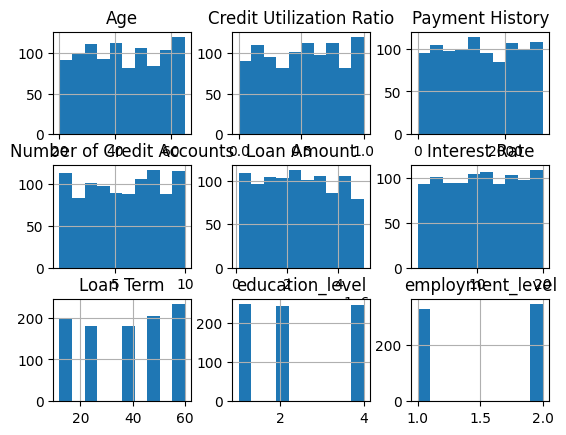

In [ ]:
Credit.hist()

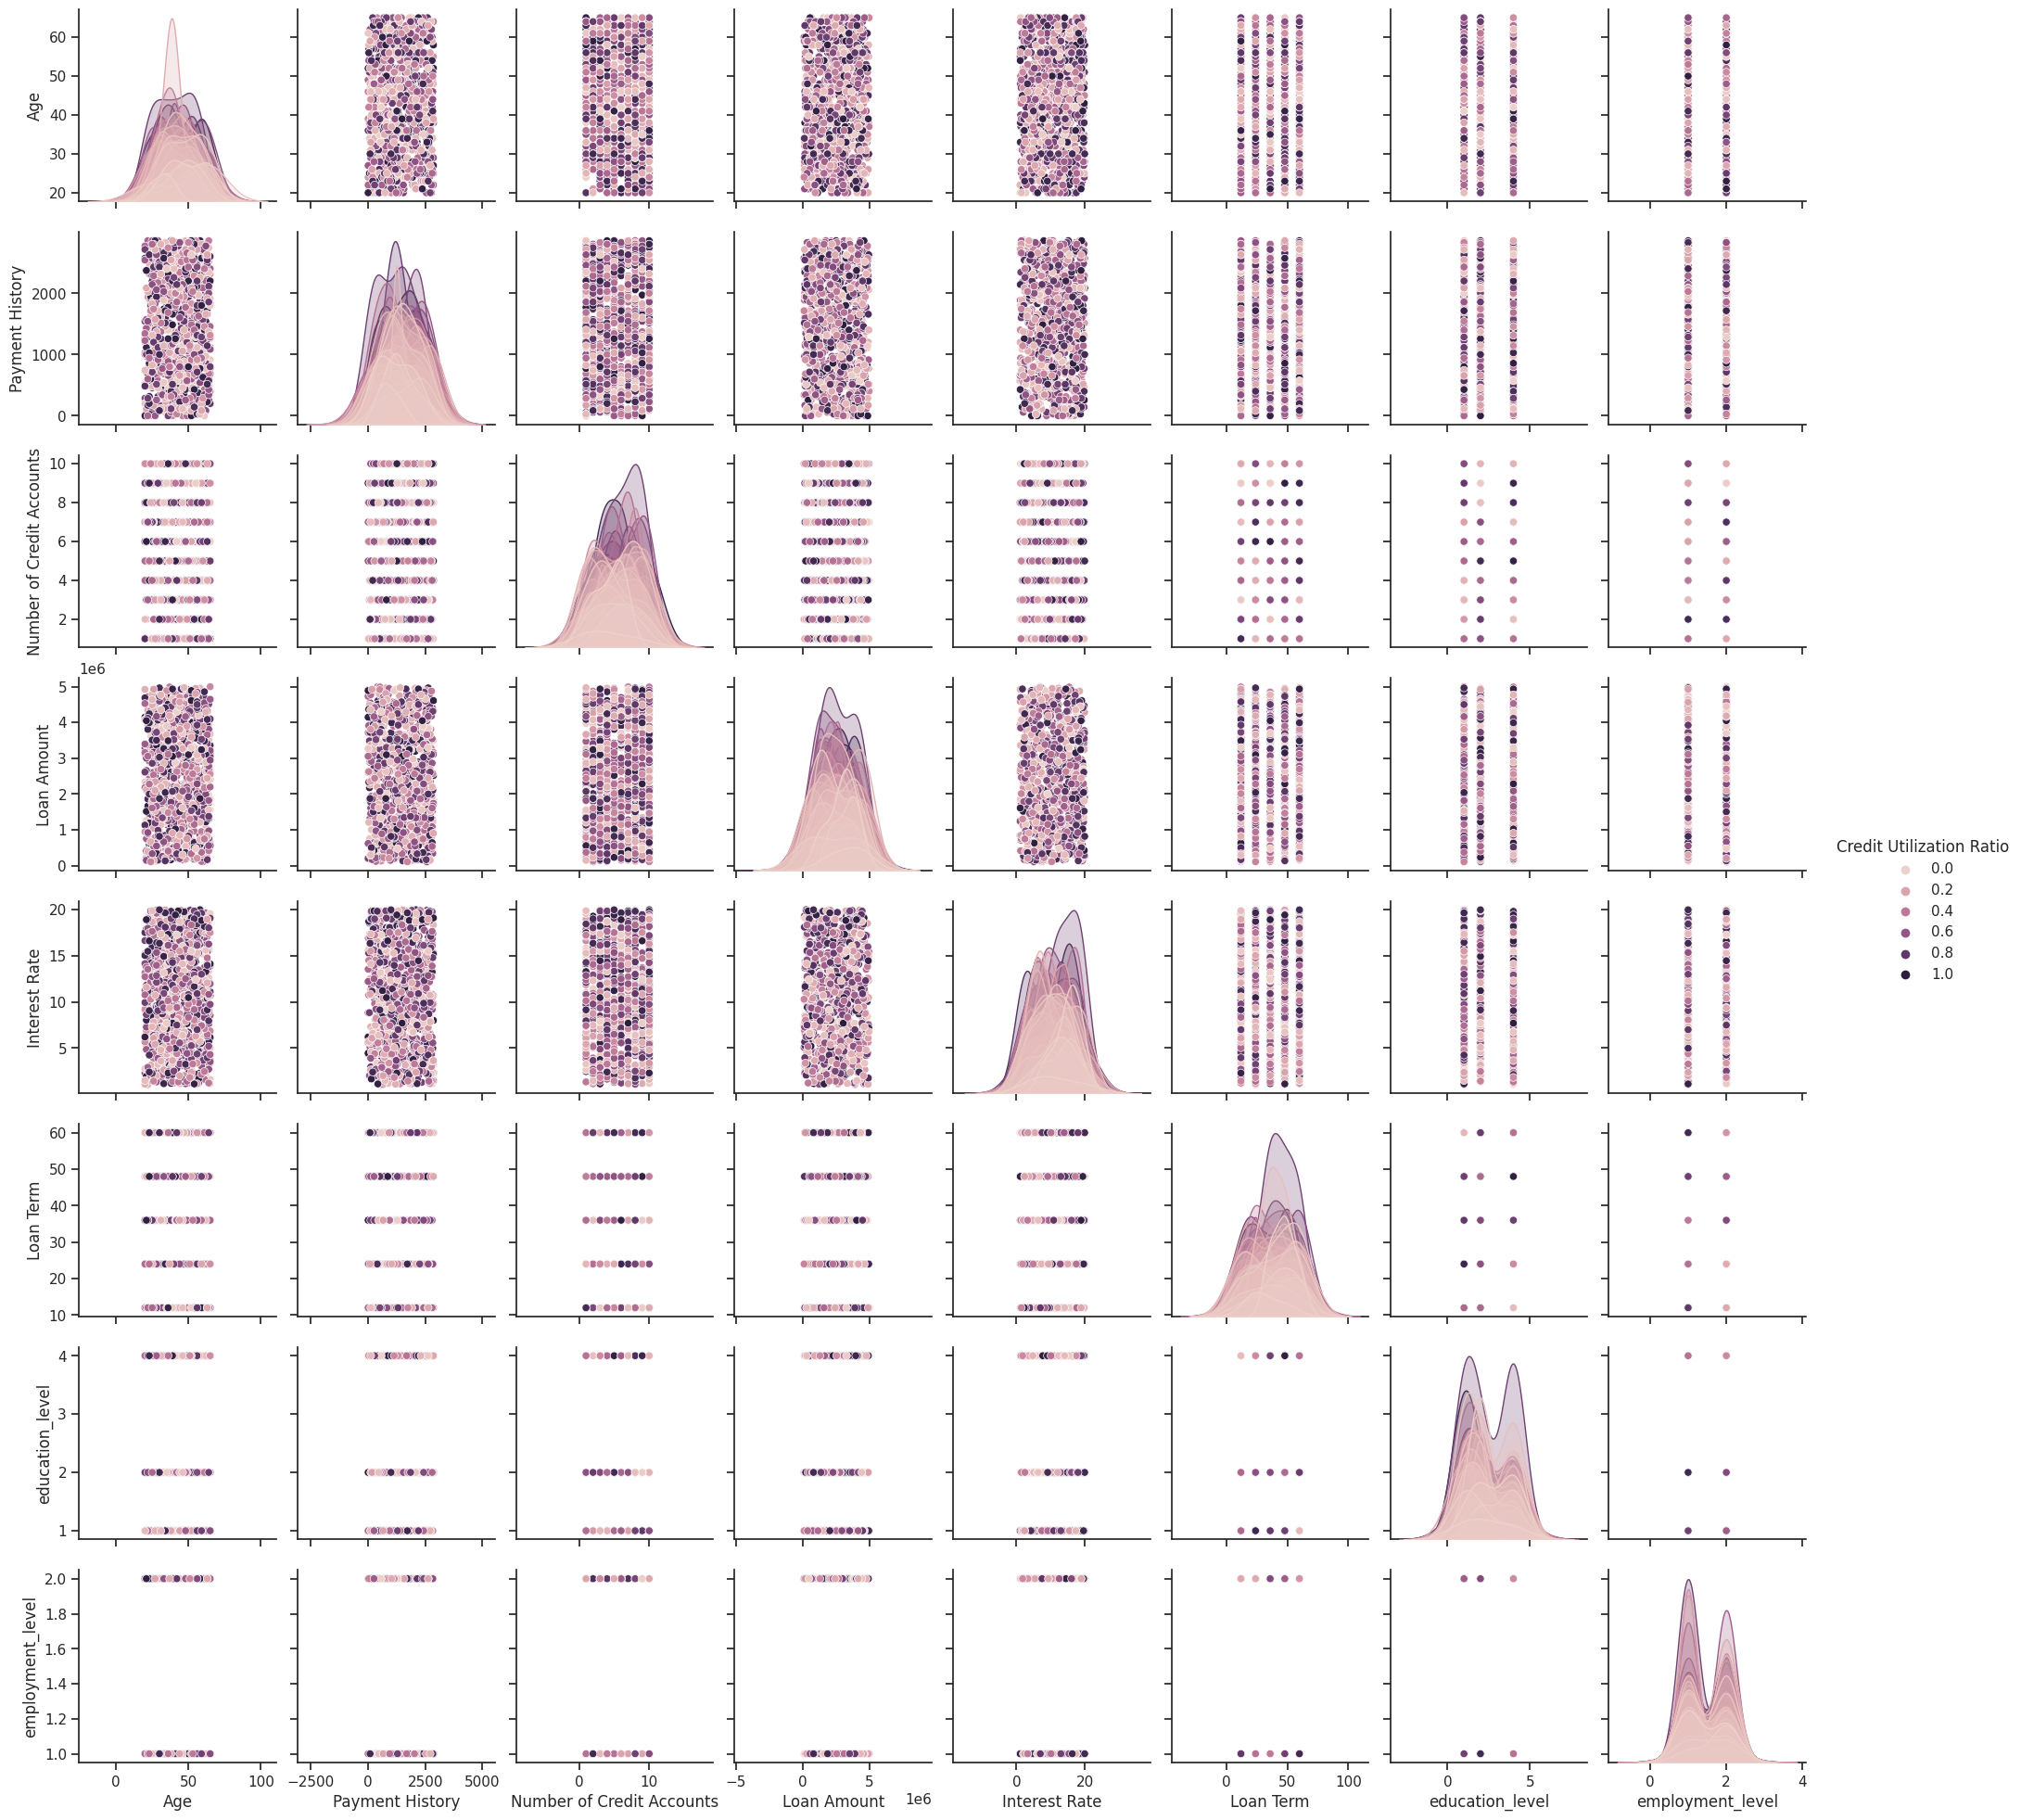

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks')
sns.pairplot(Credit, hue='Credit Utilization Ratio')
plt.show()

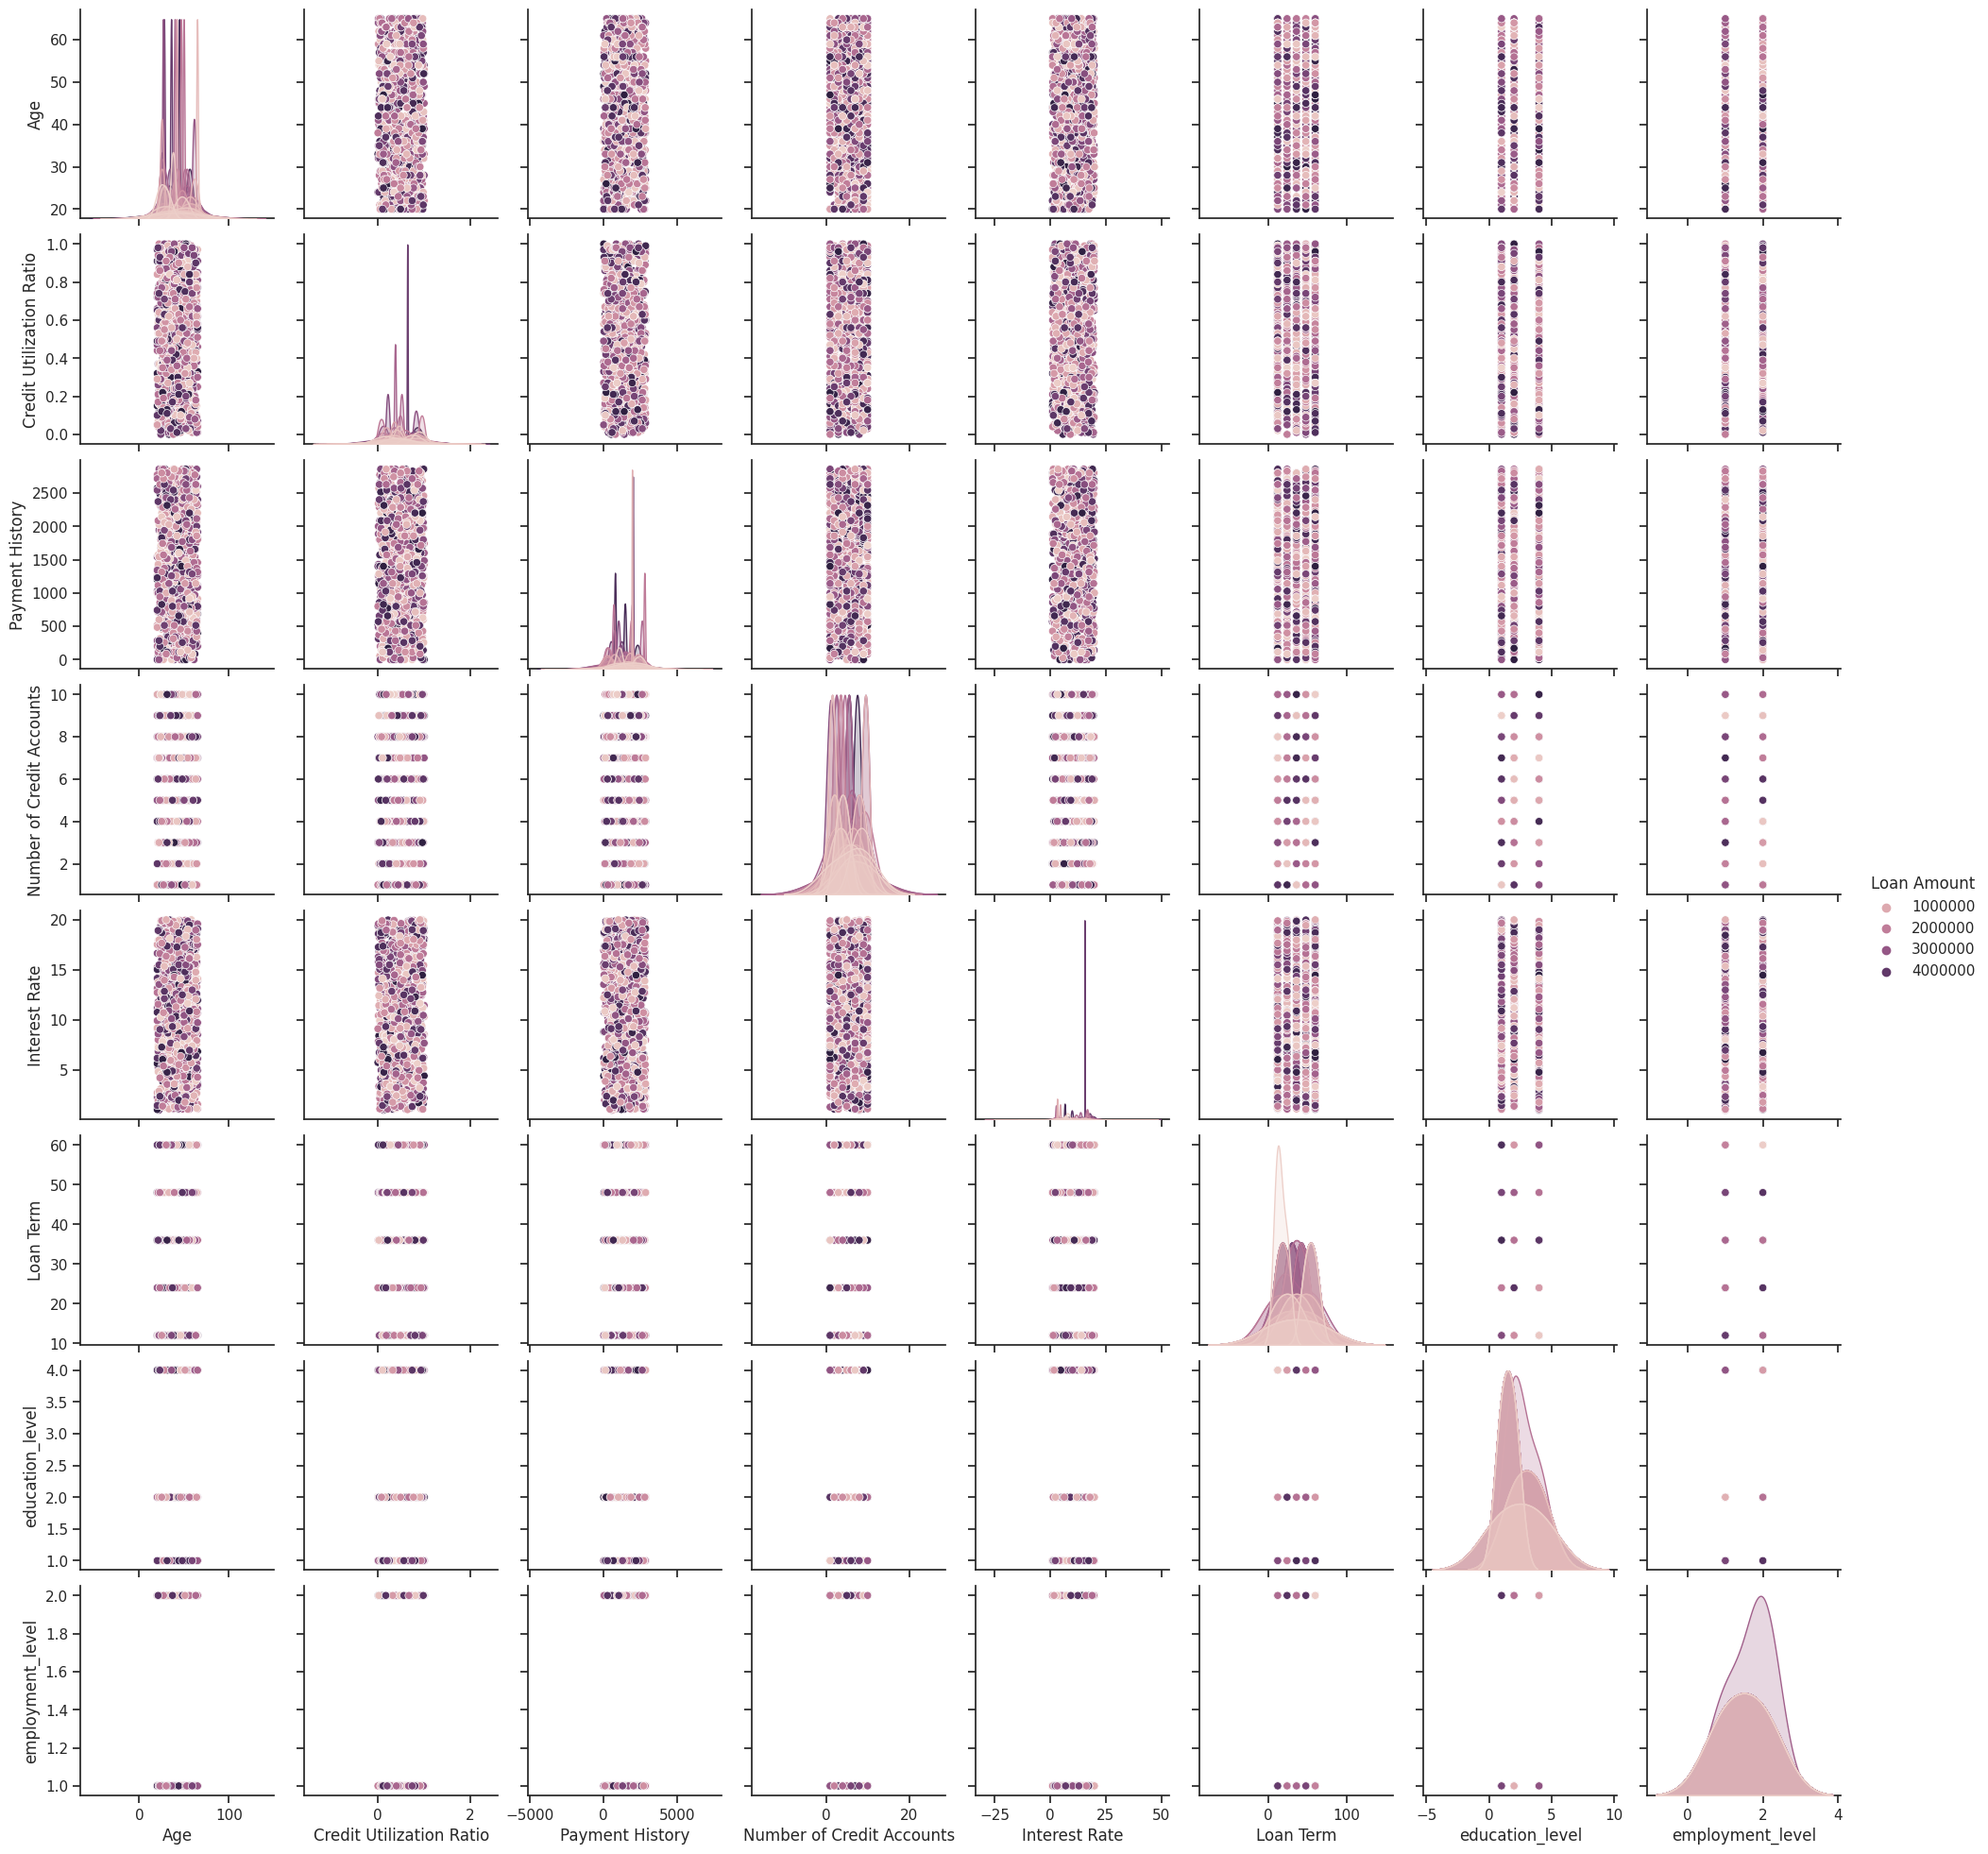

In [ ]:
sns.pairplot(Credit, hue='Loan Amount')
plt.show()

In [ ]:
import plotly.express as px
Credit_fig = px.box(Credit, y='Credit Utilization Ratio')
Credit_fig.show()

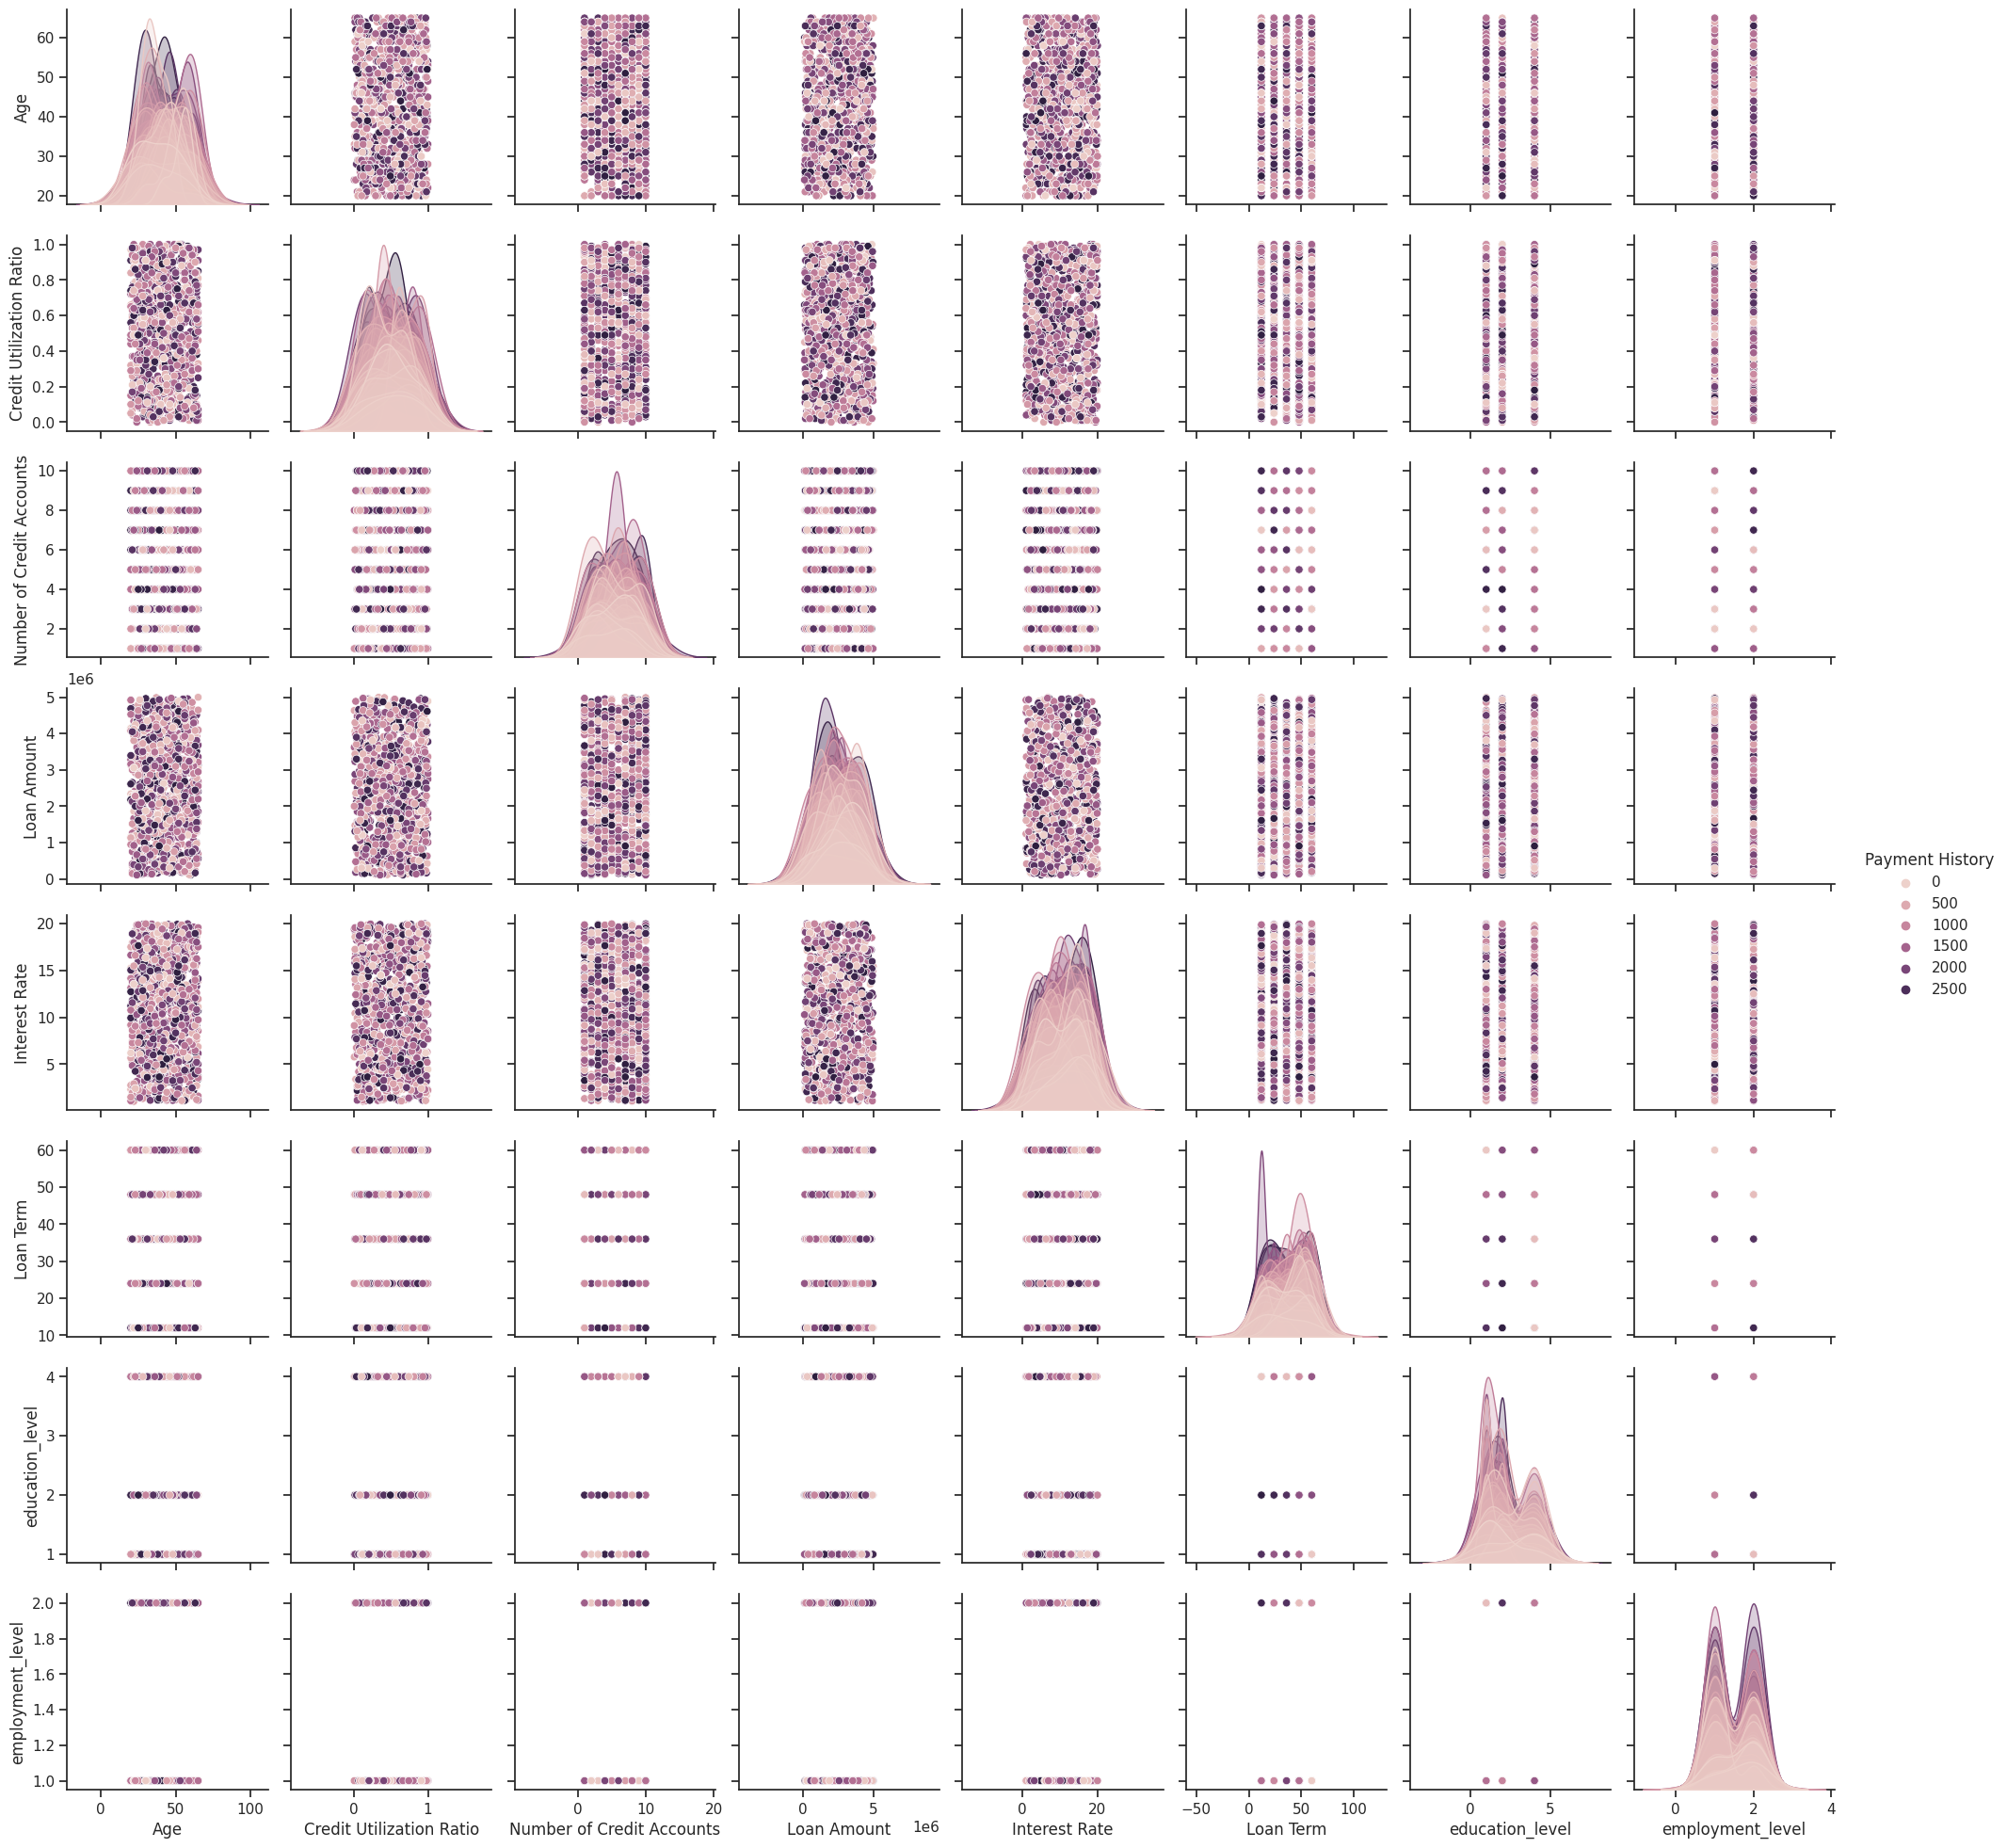

In [ ]:
sns.pairplot(Credit, hue='Payment History')
plt.show()

In [ ]:
loan_amount = px.histogram(Credit, x= 'Loan Amount')
loan_amount

In [ ]:
# Looking Correlation in the data
numeric_ = Credit[['Credit Utilization Ratio',
                   'Payment History',
                   'Number of Credit Accounts',
                   'Loan Amount',
                   'Interest Rate',
                   'Loan Term']]
corr_fig = px.imshow(numeric_.corr())
corr_fig.show()

In [ ]:
education_level = {'High School':1, 'Bachelor':2, 'Masters':3, 'PhD':4}
employment_level = {'Unemployment':0, 'Employed':1, 'Self-Employed':2}

In [ ]:
# Apply mapping to categorical features
Credit['education_level'] = Credit['Education Level'].map(education_level)
Credit['employment_level'] = Credit['Employment Status'].map(employment_level)

In [ ]:
credit_score = []

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"